In [1]:
import pandas as pd
import numpy as np
import dash
from dash import html
from dash import dcc
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go
from scipy import optimize, integrate
from dash.dependencies import Input, Output,State

In [2]:
data_of_world = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_of_world_1 = pd.read_csv(data_of_world)
data_of_world_1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [3]:
small_data = pd.read_csv(data_of_world)
small_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [4]:
time_idx = small_data.columns[4:]

In [5]:
data = pd.DataFrame({'date':time_idx})
data.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
country_list = ['Russia', 'Poland', 'Spain','Australia']

In [7]:
pd_raw = small_data.rename(columns={"Country/Region":"Nation",'Province/State':'Territory'}) 
pd_raw.head()

,Territory,Nation,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183908,184038,184224,184360,184473,184587,184819,185086,185272,185393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,298578,300058,301394,302767,303925,304890,305123,306789,308050,309278
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266542,266591,266654,266700,266772,266839,266916,267010,267096,267194
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45326,45326,45326,45326,45326,45326,45326,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102301,102301,102301,102301,102301,102301,102301


In [8]:
for each in country_list:
    data[each] =np.array(pd_raw[pd_raw['Nation']==each].iloc[:,4::].sum(axis=0))

In [9]:
data.head()

,date,Russia,Poland,Spain,Australia
0,1/22/20,0,0,0,0
1,1/23/20,0,0,0,0
2,1/24/20,0,0,0,0
3,1/25/20,0,0,0,0
4,1/26/20,0,0,0,4


In [10]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in data.date] # conversion of dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx] #conversion of datetime function to string

In [11]:
N0=3000000 #maximum susceptible population
beta=0.75   #infection spread dynamics
gamma=0.12  #recovery rate


# condition I0+S0+R0=N0
I0=data.Russia[70]
S0=N0-I0
R0=0

In [12]:
def SIR_model(SIR,beta,gamma):
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I = Susceptible*Infected 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [13]:
np.array([S0,I0,R0])

array([2997223,    2777,       0], dtype=int64)

In [14]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index= True)

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\345802770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

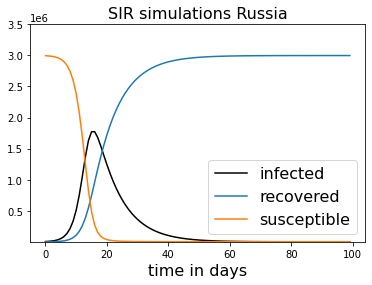

In [15]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 3500000)
ax1.set_yscale('linear')
ax1.set_title('SIR simulations Russia',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [16]:
ydata = np.array(data.Russia[135:])
t=np.arange(len(ydata))
len(t)

784

In [17]:
I0=ydata[135]
S0=N0-I0
R0=0

In [18]:
def SIR_model_t(SIR,t,beta,gamma):
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0           
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [19]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1]

In [20]:
popt=[0.5,0.2]
fit_odeint(t, *popt)

array([ 1.39082400e+06,  1.44600834e+06,  1.42868483e+06,  1.35658212e+06,
        1.25008614e+06,  1.12660400e+06,  9.98748550e+05,  8.74649138e+05,
        7.58990846e+05,  6.54078442e+05,  5.60684675e+05,  4.78655405e+05,
        4.07315214e+05,  3.45728158e+05,  2.92859548e+05,  2.47672507e+05,
        2.09182510e+05,  1.76485443e+05,  1.48769305e+05,  1.25316083e+05,
        1.05498015e+05,  8.87708485e+04,  7.46657521e+04,  6.27808680e+04,
        5.27730864e+04,  4.43503647e+04,  3.72647437e+04,  3.13061157e+04,
        2.62967361e+04,  2.20864391e+04,  1.85484973e+04,  1.55760592e+04,
        1.30790993e+04,  1.09818147e+04,  9.22041155e+03,  7.74122454e+03,
        6.49912528e+03,  5.45617534e+03,  4.58048855e+03,  3.84527106e+03,
        3.22801194e+03,  2.70980129e+03,  2.27475612e+03,  1.90953715e+03,
        1.60294242e+03,  1.34556544e+03,  1.12950794e+03,  9.48138338e+02,
        7.95888829e+02,  6.68084920e+02,  5.60802213e+02,  4.70746125e+02,
        3.95150864e+02,  

In [21]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [1.52518939e-04 2.94970309e-05]  start infect: 449256
Optimal parameters: beta = 0.0014712578551263106  and gamma =  -0.0030822485845836203


In [22]:
fitted=fit_odeint(t, *popt)

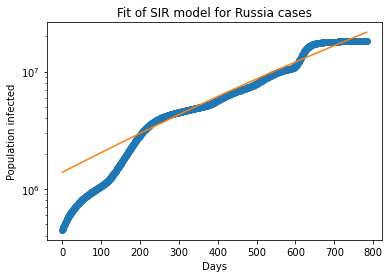

Optimal parameters: beta = 0.0014712578551263106  and gamma =  -0.0030822485845836203
Basic Reproduction Number R0  -0.4773326403603693
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible


In [23]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Russia cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible")

In [24]:
t_initial=100
t_intro_measures=24
t_hold=21
t_relax=21

beta_max=0.085
beta_min=0.04
gamma=0.02
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [25]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})

In [26]:
for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\1214783058.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [27]:
propagation_rates.tail()

,susceptible,infected,recovered
161,33762.961618,156188.85789,2810048.180492
162,33625.41381,153202.628541,2813171.95765
163,33487.181845,150276.807934,2816236.010221
164,33348.372946,147410.080675,2819241.546379
165,33209.0895,144601.162508,2822189.747993


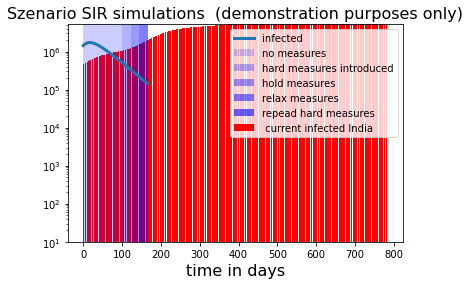

In [28]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected India',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 3*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 10});

In [29]:
time_idx = data_of_world_1.columns[4:]
sir_plot = pd.DataFrame({'date':time_idx})
sir_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [30]:
country_list = data_of_world_1['Country/Region'].unique()

In [31]:
for each in country_list:
    sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataF

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataF

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataF

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataF

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sir_plot[each] = np.array(data_of_world_1[data_of_world_1['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3892943740.py:2: PerformanceWarning: DataF

In [32]:
sir_plot.tail()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
914,7/24/22,184587,304890,266839,45326,102301,11,8736,9507562,424400,...,967808,242691,11723,532902,10767948,672039,535,11849,328550,256254
915,7/25/22,184819,305123,266916,45326,102301,11,8736,9507562,425365,...,967808,242747,11723,533195,10768844,672039,535,11849,329483,256270
916,7/26/22,185086,306789,267010,45326,102301,11,8741,9507562,425365,...,969803,242811,11723,533195,10770304,682096,535,11849,329483,256284
917,7/27/22,185272,308050,267096,45326,102301,11,8741,9507562,425365,...,969803,242879,11723,533379,10772980,682096,535,11849,329483,256315
918,7/28/22,185393,309278,267194,45508,102301,11,8741,9507562,425365,...,969803,242944,11730,534451,10774679,682096,535,11849,329483,256336


In [33]:
sir_plot= sir_plot.drop(columns = ['Taiwan*', 'South Sudan', 'Guyana','Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
                                   'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kosovo','Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Luxembourg', 'MS Zaandam', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius',
       'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines'])

In [34]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in sir_plot.date] #to convert all the dates into datetime 
time_str= [each.strftime('%Y-%m-%d') for each in time_idx] #to convert datetime function to string

In [35]:
sir_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [36]:
df_input = sir_plot.iloc[80:]

In [37]:
df_all = df_input.columns
df_all = list(df_all)

In [38]:
def SIR_model(SIR,beta,gamma):
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

def SIR_model_t(SIR,t,beta,gamma):
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

#Function defined for optimize curve fit

def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI


In [39]:
for each in df_all[1:]:
    ydata = np.array(df_input[each])
    t = np.arange(len(ydata))
    N0 = 6000000
    
    I0 = ydata[1]
    S0 = N0 - I0
    R0 = 0
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, maxfev= 40000000)
    perr = np.sqrt(np.diag(pcov))
    
    fitted=fit_odeint(t, *popt).reshape(-1,1)
    df_input[each +'_fitted'] = fitted
    

df_input

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\447820377.py:11: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\ektag\anaconda3\lib\site-packages\scipy\integrate\

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\447820377.py:11: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\447820377.py:12: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\ektag\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWar

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted


C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted


C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\AppData\Local\Temp\ipykernel_12052\3647755167.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[each +'_fitted'] = fitted
C:\Users\ektag\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warn

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay_fitted,Uzbekistan_fitted,Vanuatu_fitted,Venezuela_fitted,Vietnam_fitted,West Bank and Gaza_fitted,Winter Olympics 2022_fitted,Yemen_fitted,Zambia_fitted,Zimbabwe_fitted
80,4/11/20,521,433,1825,601,19,0,21,1975,967,...,480.000000,865.000000,0.0,181.000000,262.000000,271.000000,0.0,1.000000,43.000000,14.000000
81,4/12/20,555,446,1914,638,19,0,21,2142,1013,...,483.813411,875.146296,0.0,186.083585,263.130432,274.694823,0.0,1.015950,43.453880,14.135604
82,4/13/20,607,467,1983,646,19,0,23,2208,1039,...,487.627088,885.410864,0.0,191.306361,264.254105,278.440009,0.0,1.032154,43.912231,14.272491
83,4/14/20,665,475,2070,659,19,0,23,2277,1067,...,491.440325,895.795065,0.0,196.671932,265.370842,282.236245,0.0,1.048617,44.375090,14.410672
84,4/15/20,770,494,2160,673,19,0,23,2443,1111,...,495.252405,906.300276,0.0,202.183985,266.480466,286.084226,0.0,1.065342,44.842495,14.550159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,7/24/22,184587,304890,266839,45326,102301,11,8736,9507562,424400,...,0.142301,8557.190939,0.0,0.000121,0.592950,475404.343211,0.0,5711.577710,4.569398,30.061682
915,7/25/22,184819,305123,266916,45326,102301,11,8736,9507562,425365,...,0.140395,8473.018900,0.0,0.000117,0.586903,472747.775321,0.0,5644.100456,4.519329,29.782692
916,7/26/22,185086,306789,267010,45326,102301,11,8741,9507562,425365,...,0.138515,8389.626106,0.0,0.000114,0.580918,470093.474360,0.0,5577.179863,4.469805,29.506160
917,7/27/22,185272,308050,267096,45326,102301,11,8741,9507562,425365,...,0.136659,8307.006329,0.0,0.000111,0.574994,467441.669078,0.0,5510.817937,4.420821,29.232066


In [ ]:
app = dash.Dash(__name__)
# Define the app
fig = go.Figure()

app.layout = html.Div([
    html.H1("SIR Model"),
    html.H4("Please select any Nation"),
    
    dcc.Dropdown(id='country_dropdown_SIR',
                options=[ {'label': each,'value':each} for each in df_all[1:]],
                value='India', # which are pre-selected
                multi= False),
    
    dcc.Graph(id = "SIR_model"
    )
])

@app.callback(
    Output('SIR_model', 'figure'),
    [Input('country_dropdown_SIR', 'value')])

def SIR_fig(con_input):
    df= df_input
    
    for i in df[1:]:
        data = []
        trace = go.Scatter(x=df.date,
                        y=df[con_input],
                        mode='lines+markers',
                        name = con_input)
        data.append(trace)
        
        trace_fitted = go.Scatter(x=df.date,
                        y=df[con_input +'_fitted'], 
                        mode='lines+markers',
                        name=con_input+'_fitted')
        data.append(trace_fitted)
        
        
            
    return {'data': data,
            'layout' : dict(
                width=1280,
                height=720,
                title= 'SIR model',
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
                
            )
        }

if __name__ == '__main__':
    app.run_server(port=4050)

Dash is running on http://127.0.0.1:4050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4050/ (Press CTRL+C to quit)
